In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [36]:
earthquake_base = pd.read_csv("earthquake_alert_balanced_dataset.csv")
earthquake_base

,magnitude,depth,cdi,mmi,sig,alert
0,7.00,14.0,8.0,7.0,0.0,green
1,6.90,25.0,4.0,4.0,-33.0,green
2,7.00,579.0,3.0,3.0,-13.0,green
3,7.30,37.0,5.0,5.0,65.0,green
4,6.60,624.0,0.0,2.0,-98.0,green
...,...,...,...,...,...,...
1295,6.87,11.0,9.0,7.0,13.0,yellow
1296,7.85,93.0,8.0,6.0,-51.0,yellow
1297,7.48,142.0,7.0,6.0,120.0,yellow
1298,7.04,51.0,7.0,6.0,-115.0,yellow


In [37]:
earthquake_base.isnull().sum()

magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

In [38]:
earthquake_base.describe()

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


<Axes: xlabel='alert', ylabel='count'>

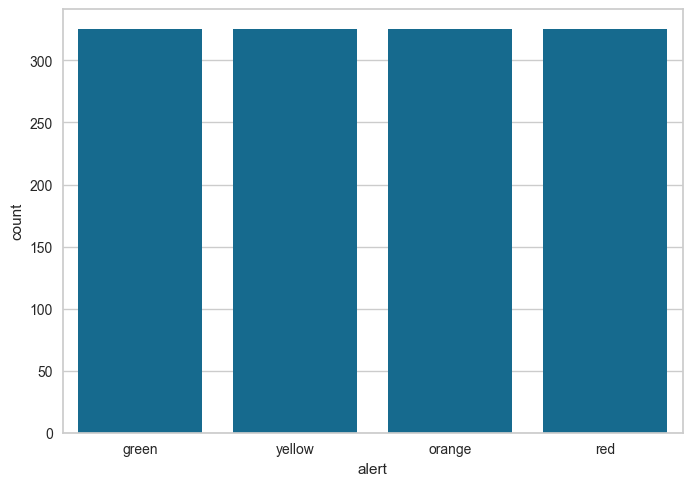

In [39]:
sns.countplot(x=earthquake_base['alert'])

In [40]:
x_earthquake = earthquake_base.iloc[:, 0:5].values
y_earthquake = earthquake_base.iloc[:, 5].values

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_earthquake = scaler.fit_transform(x_earthquake)

In [42]:
from sklearn.model_selection import train_test_split

x_earthquake_train, x_earthquake_test, y_earthquake_train, y_earthquake_test = train_test_split(x_earthquake, y_earthquake, test_size=0.2, random_state=0)
x_earthquake_train.shape, x_earthquake_test.shape

((1040, 5), (260, 5))

In [43]:
y_earthquake_train.shape, y_earthquake_test.shape

((1040,), (260,))

In [44]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10)
svm.fit(x_earthquake_train, y_earthquake_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
previsoes = svm.predict(x_earthquake_test)
previsoes

array(['orange', 'red', 'red', 'orange', 'green', 'red', 'green', 'green',
       'red', 'green', 'yellow', 'green', 'green', 'red', 'yellow',
       'yellow', 'green', 'green', 'red', 'orange', 'yellow', 'yellow',
       'yellow', 'orange', 'red', 'orange', 'red', 'red', 'yellow',
       'orange', 'red', 'red', 'red', 'yellow', 'red', 'red', 'red',
       'green', 'red', 'orange', 'green', 'green', 'yellow', 'green',
       'red', 'red', 'yellow', 'red', 'yellow', 'green', 'green', 'red',
       'yellow', 'green', 'red', 'red', 'orange', 'orange', 'yellow',
       'yellow', 'green', 'yellow', 'green', 'yellow', 'green', 'red',
       'green', 'yellow', 'yellow', 'red', 'orange', 'yellow', 'yellow',
       'yellow', 'yellow', 'red', 'orange', 'red', 'red', 'green',
       'orange', 'orange', 'yellow', 'red', 'yellow', 'red', 'orange',
       'green', 'red', 'red', 'red', 'yellow', 'green', 'red', 'yellow',
       'red', 'green', 'orange', 'red', 'red', 'red', 'yellow', 'green',
       

In [46]:
y_earthquake_test

array(['orange', 'red', 'red', 'orange', 'green', 'yellow', 'green',
       'green', 'yellow', 'green', 'yellow', 'green', 'green', 'red',
       'yellow', 'green', 'green', 'green', 'red', 'orange', 'yellow',
       'yellow', 'yellow', 'orange', 'red', 'orange', 'red', 'red',
       'yellow', 'orange', 'red', 'orange', 'orange', 'yellow', 'red',
       'red', 'red', 'orange', 'orange', 'orange', 'yellow', 'green',
       'yellow', 'green', 'red', 'red', 'yellow', 'orange', 'yellow',
       'green', 'green', 'red', 'yellow', 'green', 'red', 'red', 'orange',
       'orange', 'yellow', 'yellow', 'green', 'yellow', 'yellow',
       'yellow', 'green', 'orange', 'green', 'green', 'yellow', 'red',
       'orange', 'yellow', 'yellow', 'yellow', 'green', 'red', 'orange',
       'orange', 'red', 'green', 'red', 'orange', 'green', 'orange',
       'yellow', 'red', 'orange', 'green', 'orange', 'red', 'red',
       'yellow', 'green', 'red', 'yellow', 'red', 'green', 'orange',
       'red', 'red', 

In [47]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_earthquake_test, previsoes), 3)

0.812

0.8115384615384615

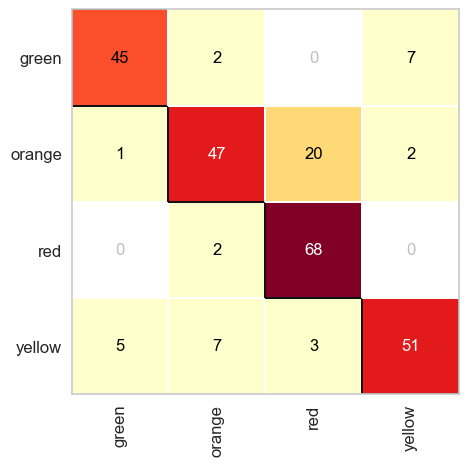

In [48]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))
cm = ConfusionMatrix(svm)
cm.fit(x_earthquake_train, y_earthquake_train)
cm.score(x_earthquake_test, y_earthquake_test)

In [49]:
kernels = ['linear', 'rbf', "sigmoid", "poly"]
Cs = [0.1, 0.5, 1.0, 1.5, 2.0, 10]
best_score = 0
best_kernel = None
best_C = None

for i in kernels:
    for j in Cs:
        svm = SVC(kernel= i, C= j)
        svm.fit(x_earthquake_train, y_earthquake_train)
        previsoes = svm.predict(x_earthquake_test)
        score = accuracy_score(y_earthquake_test, previsoes)

        if score > best_score:
            best_score = score
            best_kernel = i
            best_C = j

print(f"\nBest score: {best_score}")
print(f"\nBest kernel: {best_kernel}")
print(f"\nBest C: {best_C}")


Best score: 0.8115384615384615

Best kernel: rbf

Best C: 10


In [53]:
from sklearn.model_selection import GridSearchCV
parametros = {'C': [1.0, 1.5, 2.0, 10],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [54]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_earthquake, y_earthquake)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 10, 'kernel': 'rbf'}
0.8169230769230771


In [59]:
parametros = {'n_estimators': [10, 40, 100, 150, 200]}

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid= parametros)
grid_search.fit(x_earthquake, y_earthquake)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_estimators': 200}
0.9115384615384615
